In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp

# Fetal Deaths

In [37]:
df1 = pd.read_csv('fetaldeaths.csv')

In [38]:
df1.head()

,Region,Year,Fetal Deaths,Total Livebirths
0,NCR (Metro Manila),2010,1507,232588
1,CAR (Cordillera),2010,118,32104
2,Region 1 (Ilocos),2010,566,95127
3,Region 2 (Cagayan Valley),2010,177,67958
4,Region 3 (Central Luzon),2010,523,201479


In [39]:
df1.dtypes

Region              object
Year                 int64
Fetal Deaths         int64
Total Livebirths     int64
dtype: object

In [40]:
df1['Region'] = df1['Region'].str.replace(r" \(.*\)","")

## Treating Missing Values
### Total Livebirths

In [41]:
df1a = df1.pivot(index='Year',columns='Region',values='Total Livebirths')

In [42]:
df1a = df1a.replace(0,np.nan)

In [43]:
df1a

Region,ARMM,CAR,CARAGA,NCR,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4,Region 4A,Region 4B,Region 5,Region 6,Region 7,Region 8,Region 9
Year,,,,,,,,,,,,,,,,,,
2001,53260.0,30413.0,39910.0,224881.0,93089.0,70924.0,103909.0,48412.0,59304.0,160314.0,274120.0,NaN,NaN,108876.0,128618.0,136666.0,81635.0,69762.0
2002,48940.0,29764.0,39786.0,222744.0,93217.0,61856.0,69374.0,51277.0,59418.0,180105.0,276220.0,NaN,NaN,109658.0,125794.0,129963.0,83545.0,59037.0
2003,57957.0,30027.0,40481.0,187182.0,90758.0,78825.0,74949.0,70834.0,62674.0,178748.0,NaN,237771.0,49465.0,114009.0,128590.0,132816.0,81337.0,64952.0
2004,60062.0,32507.0,42980.0,190525.0,93631.0,87272.0,82460.0,70652.0,63080.0,199264.0,NaN,216968.0,54574.0,114482.0,133132.0,135675.0,89397.0,62143.0
2005,65613.0,32196.0,44301.0,180454.0,94072.0,95819.0,87960.0,74915.0,64832.0,192590.0,NaN,214156.0,52666.0,118384.0,133169.0,142546.0,91215.0,62890.0
2006,67928.0,30503.0,42245.0,219722.0,92845.0,89480.0,89626.0,76401.0,63138.0,196341.0,NaN,234467.0,51949.0,113434.0,128560.0,137102.0,78306.0,63883.0
2007,71425.0,30485.0,41961.0,224831.0,96468.0,92288.0,90411.0,84828.0,67276.0,207544.0,NaN,247365.0,51155.0,115304.0,137688.0,151096.0,85554.0,65192.0
2008,79474.0,33377.0,47444.0,220413.0,99426.0,92075.0,93916.0,86413.0,68040.0,214475.0,NaN,250091.0,56105.0,118507.0,145499.0,150300.0,91072.0,70624.0
2009,80833.0,35651.0,NaN,226630.0,95108.0,93865.0,95388.0,85546.0,NaN,206217.0,NaN,250120.0,NaN,116092.0,132901.0,NaN,NaN,NaN


In [44]:
df1a['CARAGA'] = df1a['CARAGA'].interpolate()
df1a['Region 2'] = df1a['Region 2'].interpolate()
df1a['Region 7'] = df1a['Region 7'].interpolate()
df1a['Region 8'] = df1a['Region 8'].interpolate()
df1a['Region 9'] = df1a['Region 9'].interpolate()

In [45]:
df1a

Region,ARMM,CAR,CARAGA,NCR,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4,Region 4A,Region 4B,Region 5,Region 6,Region 7,Region 8,Region 9
Year,,,,,,,,,,,,,,,,,,
2001,53260.0,30413.0,39910.0,224881.0,93089.0,70924.0,103909.0,48412.0,59304.0,160314.0,274120.0,NaN,NaN,108876.0,128618.0,136666.0,81635.0,69762.0
2002,48940.0,29764.0,39786.0,222744.0,93217.0,61856.0,69374.0,51277.0,59418.0,180105.0,276220.0,NaN,NaN,109658.0,125794.0,129963.0,83545.0,59037.0
2003,57957.0,30027.0,40481.0,187182.0,90758.0,78825.0,74949.0,70834.0,62674.0,178748.0,NaN,237771.0,49465.0,114009.0,128590.0,132816.0,81337.0,64952.0
2004,60062.0,32507.0,42980.0,190525.0,93631.0,87272.0,82460.0,70652.0,63080.0,199264.0,NaN,216968.0,54574.0,114482.0,133132.0,135675.0,89397.0,62143.0
2005,65613.0,32196.0,44301.0,180454.0,94072.0,95819.0,87960.0,74915.0,64832.0,192590.0,NaN,214156.0,52666.0,118384.0,133169.0,142546.0,91215.0,62890.0
2006,67928.0,30503.0,42245.0,219722.0,92845.0,89480.0,89626.0,76401.0,63138.0,196341.0,NaN,234467.0,51949.0,113434.0,128560.0,137102.0,78306.0,63883.0
2007,71425.0,30485.0,41961.0,224831.0,96468.0,92288.0,90411.0,84828.0,67276.0,207544.0,NaN,247365.0,51155.0,115304.0,137688.0,151096.0,85554.0,65192.0
2008,79474.0,33377.0,47444.0,220413.0,99426.0,92075.0,93916.0,86413.0,68040.0,214475.0,NaN,250091.0,56105.0,118507.0,145499.0,150300.0,91072.0,70624.0
2009,80833.0,35651.0,49595.0,226630.0,95108.0,93865.0,95388.0,85546.0,67999.0,206217.0,NaN,250120.0,NaN,116092.0,132901.0,149693.0,91404.5,72018.5


In [46]:
df1a.loc[2011,'Region 4B'] = 60945

In [47]:
df1a['Region 4B'] = df1a['Region 4B'].interpolate()

In [48]:
df1a

Region,ARMM,CAR,CARAGA,NCR,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4,Region 4A,Region 4B,Region 5,Region 6,Region 7,Region 8,Region 9
Year,,,,,,,,,,,,,,,,,,
2001,53260.0,30413.0,39910.0,224881.0,93089.0,70924.0,103909.0,48412.0,59304.0,160314.0,274120.0,NaN,NaN,108876.0,128618.0,136666.0,81635.0,69762.0
2002,48940.0,29764.0,39786.0,222744.0,93217.0,61856.0,69374.0,51277.0,59418.0,180105.0,276220.0,NaN,NaN,109658.0,125794.0,129963.0,83545.0,59037.0
2003,57957.0,30027.0,40481.0,187182.0,90758.0,78825.0,74949.0,70834.0,62674.0,178748.0,NaN,237771.0,49465.000000,114009.0,128590.0,132816.0,81337.0,64952.0
2004,60062.0,32507.0,42980.0,190525.0,93631.0,87272.0,82460.0,70652.0,63080.0,199264.0,NaN,216968.0,54574.000000,114482.0,133132.0,135675.0,89397.0,62143.0
2005,65613.0,32196.0,44301.0,180454.0,94072.0,95819.0,87960.0,74915.0,64832.0,192590.0,NaN,214156.0,52666.000000,118384.0,133169.0,142546.0,91215.0,62890.0
2006,67928.0,30503.0,42245.0,219722.0,92845.0,89480.0,89626.0,76401.0,63138.0,196341.0,NaN,234467.0,51949.000000,113434.0,128560.0,137102.0,78306.0,63883.0
2007,71425.0,30485.0,41961.0,224831.0,96468.0,92288.0,90411.0,84828.0,67276.0,207544.0,NaN,247365.0,51155.000000,115304.0,137688.0,151096.0,85554.0,65192.0
2008,79474.0,33377.0,47444.0,220413.0,99426.0,92075.0,93916.0,86413.0,68040.0,214475.0,NaN,250091.0,56105.000000,118507.0,145499.0,150300.0,91072.0,70624.0
2009,80833.0,35651.0,49595.0,226630.0,95108.0,93865.0,95388.0,85546.0,67999.0,206217.0,NaN,250120.0,57718.333333,116092.0,132901.0,149693.0,91404.5,72018.5


In [49]:
df1a = df1a[:-1]

In [50]:
df1a['Region 4'].loc[2003:] = df1a['Region 4A'].loc[2003:] + df1a['Region 4B'].loc[2003:]

/Users/raei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
df1a

Region,ARMM,CAR,CARAGA,NCR,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4,Region 4A,Region 4B,Region 5,Region 6,Region 7,Region 8,Region 9
Year,,,,,,,,,,,,,,,,,,
2001,53260.0,30413.0,39910.0,224881.0,93089.0,70924.0,103909.0,48412.0,59304.0,160314.0,274120.000000,NaN,NaN,108876.0,128618.0,136666.0,81635.0,69762.0
2002,48940.0,29764.0,39786.0,222744.0,93217.0,61856.0,69374.0,51277.0,59418.0,180105.0,276220.000000,NaN,NaN,109658.0,125794.0,129963.0,83545.0,59037.0
2003,57957.0,30027.0,40481.0,187182.0,90758.0,78825.0,74949.0,70834.0,62674.0,178748.0,287236.000000,237771.0,49465.000000,114009.0,128590.0,132816.0,81337.0,64952.0
2004,60062.0,32507.0,42980.0,190525.0,93631.0,87272.0,82460.0,70652.0,63080.0,199264.0,271542.000000,216968.0,54574.000000,114482.0,133132.0,135675.0,89397.0,62143.0
2005,65613.0,32196.0,44301.0,180454.0,94072.0,95819.0,87960.0,74915.0,64832.0,192590.0,266822.000000,214156.0,52666.000000,118384.0,133169.0,142546.0,91215.0,62890.0
2006,67928.0,30503.0,42245.0,219722.0,92845.0,89480.0,89626.0,76401.0,63138.0,196341.0,286416.000000,234467.0,51949.000000,113434.0,128560.0,137102.0,78306.0,63883.0
2007,71425.0,30485.0,41961.0,224831.0,96468.0,92288.0,90411.0,84828.0,67276.0,207544.0,298520.000000,247365.0,51155.000000,115304.0,137688.0,151096.0,85554.0,65192.0
2008,79474.0,33377.0,47444.0,220413.0,99426.0,92075.0,93916.0,86413.0,68040.0,214475.0,306196.000000,250091.0,56105.000000,118507.0,145499.0,150300.0,91072.0,70624.0
2009,80833.0,35651.0,49595.0,226630.0,95108.0,93865.0,95388.0,85546.0,67999.0,206217.0,307838.333333,250120.0,57718.333333,116092.0,132901.0,149693.0,91404.5,72018.5


In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
X = df1a['Region 4'].loc[2003:].values.reshape(-1, 1)
y = df1a['Region 4A'].loc[2003:].values

In [54]:
model = LinearRegression().fit(X,y)

In [55]:
X_ = df1a['Region 4'].loc[:2002].values.reshape(-1, 1)
X_

array([[274120.],
       [276220.]])

In [56]:
results = model.predict(X_).astype(int)
results

array([221735, 223615])

In [57]:
X_ - results.reshape(-1,1)

array([[52385.],
       [52605.]])

In [58]:
df1a.loc[2001:2002,'Region 4A'] = results
df1a.loc[2001:2002,'Region 4B'] = (X_ - results.reshape(-1,1)).reshape(1,-1)

/Users/raei/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/raei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/raei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
df1a= df1a.drop(columns='Region 4')
df1a

Region,ARMM,CAR,CARAGA,NCR,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4A,Region 4B,Region 5,Region 6,Region 7,Region 8,Region 9
Year,,,,,,,,,,,,,,,,,
2001,53260.0,30413.0,39910.0,224881.0,93089.0,70924.0,103909.0,48412.0,59304.0,160314.0,221735.0,52385.000000,108876.0,128618.0,136666.0,81635.0,69762.0
2002,48940.0,29764.0,39786.0,222744.0,93217.0,61856.0,69374.0,51277.0,59418.0,180105.0,223615.0,52605.000000,109658.0,125794.0,129963.0,83545.0,59037.0
2003,57957.0,30027.0,40481.0,187182.0,90758.0,78825.0,74949.0,70834.0,62674.0,178748.0,237771.0,49465.000000,114009.0,128590.0,132816.0,81337.0,64952.0
2004,60062.0,32507.0,42980.0,190525.0,93631.0,87272.0,82460.0,70652.0,63080.0,199264.0,216968.0,54574.000000,114482.0,133132.0,135675.0,89397.0,62143.0
2005,65613.0,32196.0,44301.0,180454.0,94072.0,95819.0,87960.0,74915.0,64832.0,192590.0,214156.0,52666.000000,118384.0,133169.0,142546.0,91215.0,62890.0
2006,67928.0,30503.0,42245.0,219722.0,92845.0,89480.0,89626.0,76401.0,63138.0,196341.0,234467.0,51949.000000,113434.0,128560.0,137102.0,78306.0,63883.0
2007,71425.0,30485.0,41961.0,224831.0,96468.0,92288.0,90411.0,84828.0,67276.0,207544.0,247365.0,51155.000000,115304.0,137688.0,151096.0,85554.0,65192.0
2008,79474.0,33377.0,47444.0,220413.0,99426.0,92075.0,93916.0,86413.0,68040.0,214475.0,250091.0,56105.000000,118507.0,145499.0,150300.0,91072.0,70624.0
2009,80833.0,35651.0,49595.0,226630.0,95108.0,93865.0,95388.0,85546.0,67999.0,206217.0,250120.0,57718.333333,116092.0,132901.0,149693.0,91404.5,72018.5


In [60]:
df1b = df1a.copy()
df1b['Year'] = df1b.index
df1b = df1b.melt(id_vars=['Year'])
df1b.columns = df1b.columns.str.replace('value','Total Livebirths')
df1b.head()

,Year,Region,Total Livebirths
0,2001,ARMM,53260.0
1,2002,ARMM,48940.0
2,2003,ARMM,57957.0
3,2004,ARMM,60062.0
4,2005,ARMM,65613.0


### Fetal Deaths

In [61]:
df2 = df1.pivot(index='Year',columns='Region',values='Fetal Deaths')
df2

Region,ARMM,CAR,CARAGA,NCR,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4,Region 4A,Region 4B,Region 5,Region 6,Region 7,Region 8,Region 9
Year,,,,,,,,,,,,,,,,,,
2001,3.0,111.0,114.0,2188.0,625.0,234.0,383.0,161.0,132.0,711.0,2138.0,NaN,NaN,574.0,744.0,1044.0,260.0,202.0
2002,5.0,153.0,107.0,2138.0,621.0,312.0,379.0,136.0,134.0,752.0,2122.0,NaN,NaN,595.0,402.0,1066.0,217.0,199.0
2003,13.0,113.0,99.0,2093.0,633.0,417.0,227.0,176.0,144.0,647.0,NaN,1708.0,271.0,575.0,424.0,1022.0,208.0,215.0
2004,3.0,143.0,97.0,2193.0,592.0,393.0,229.0,206.0,156.0,625.0,NaN,1511.0,256.0,497.0,663.0,946.0,211.0,214.0
2005,11.0,165.0,118.0,2550.0,687.0,484.0,307.0,261.0,167.0,603.0,NaN,1681.0,252.0,657.0,731.0,1264.0,212.0,201.0
2006,15.0,118.0,87.0,2026.0,572.0,430.0,290.0,196.0,153.0,551.0,NaN,1447.0,227.0,483.0,544.0,974.0,164.0,181.0
2007,7.0,103.0,80.0,1796.0,521.0,327.0,270.0,207.0,126.0,559.0,NaN,1545.0,207.0,522.0,525.0,1052.0,183.0,161.0
2008,8.0,134.0,96.0,1666.0,596.0,415.0,280.0,183.0,160.0,594.0,NaN,1513.0,208.0,507.0,565.0,1002.0,200.0,179.0
2009,0.0,98.0,104.0,1692.0,535.0,347.0,282.0,206.0,138.0,520.0,NaN,1536.0,191.0,501.0,559.0,989.0,188.0,157.0


In [62]:
df2['Region 4'].loc[2003:] = df2['Region 4A'].loc[2003:] + df2['Region 4B'].loc[2003:]
df2

Region,ARMM,CAR,CARAGA,NCR,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4,Region 4A,Region 4B,Region 5,Region 6,Region 7,Region 8,Region 9
Year,,,,,,,,,,,,,,,,,,
2001,3.0,111.0,114.0,2188.0,625.0,234.0,383.0,161.0,132.0,711.0,2138.0,NaN,NaN,574.0,744.0,1044.0,260.0,202.0
2002,5.0,153.0,107.0,2138.0,621.0,312.0,379.0,136.0,134.0,752.0,2122.0,NaN,NaN,595.0,402.0,1066.0,217.0,199.0
2003,13.0,113.0,99.0,2093.0,633.0,417.0,227.0,176.0,144.0,647.0,1979.0,1708.0,271.0,575.0,424.0,1022.0,208.0,215.0
2004,3.0,143.0,97.0,2193.0,592.0,393.0,229.0,206.0,156.0,625.0,1767.0,1511.0,256.0,497.0,663.0,946.0,211.0,214.0
2005,11.0,165.0,118.0,2550.0,687.0,484.0,307.0,261.0,167.0,603.0,1933.0,1681.0,252.0,657.0,731.0,1264.0,212.0,201.0
2006,15.0,118.0,87.0,2026.0,572.0,430.0,290.0,196.0,153.0,551.0,1674.0,1447.0,227.0,483.0,544.0,974.0,164.0,181.0
2007,7.0,103.0,80.0,1796.0,521.0,327.0,270.0,207.0,126.0,559.0,1752.0,1545.0,207.0,522.0,525.0,1052.0,183.0,161.0
2008,8.0,134.0,96.0,1666.0,596.0,415.0,280.0,183.0,160.0,594.0,1721.0,1513.0,208.0,507.0,565.0,1002.0,200.0,179.0
2009,0.0,98.0,104.0,1692.0,535.0,347.0,282.0,206.0,138.0,520.0,1727.0,1536.0,191.0,501.0,559.0,989.0,188.0,157.0


In [63]:
X = df2['Region 4'].loc[2003:].values.reshape(-1, 1)
y = df2['Region 4A'].loc[2003:].values
model = LinearRegression().fit(X,y)

In [64]:
X_ = df2['Region 4'].loc[:2002].values.reshape(-1, 1)
X_

array([[2138.],
       [2122.]])

In [65]:
results = model.predict(X_).astype(int)
results

array([1843, 1830])

In [66]:
X_ - results.reshape(-1,1)

array([[295.],
       [292.]])

In [67]:
df2.loc[2001:2002,'Region 4A'] = results
df2.loc[2001:2002,'Region 4B'] = (X_ - results.reshape(-1,1)).reshape(1,-1)

In [68]:
df2

Region,ARMM,CAR,CARAGA,NCR,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4,Region 4A,Region 4B,Region 5,Region 6,Region 7,Region 8,Region 9
Year,,,,,,,,,,,,,,,,,,
2001,3.0,111.0,114.0,2188.0,625.0,234.0,383.0,161.0,132.0,711.0,2138.0,1843.0,295.0,574.0,744.0,1044.0,260.0,202.0
2002,5.0,153.0,107.0,2138.0,621.0,312.0,379.0,136.0,134.0,752.0,2122.0,1830.0,292.0,595.0,402.0,1066.0,217.0,199.0
2003,13.0,113.0,99.0,2093.0,633.0,417.0,227.0,176.0,144.0,647.0,1979.0,1708.0,271.0,575.0,424.0,1022.0,208.0,215.0
2004,3.0,143.0,97.0,2193.0,592.0,393.0,229.0,206.0,156.0,625.0,1767.0,1511.0,256.0,497.0,663.0,946.0,211.0,214.0
2005,11.0,165.0,118.0,2550.0,687.0,484.0,307.0,261.0,167.0,603.0,1933.0,1681.0,252.0,657.0,731.0,1264.0,212.0,201.0
2006,15.0,118.0,87.0,2026.0,572.0,430.0,290.0,196.0,153.0,551.0,1674.0,1447.0,227.0,483.0,544.0,974.0,164.0,181.0
2007,7.0,103.0,80.0,1796.0,521.0,327.0,270.0,207.0,126.0,559.0,1752.0,1545.0,207.0,522.0,525.0,1052.0,183.0,161.0
2008,8.0,134.0,96.0,1666.0,596.0,415.0,280.0,183.0,160.0,594.0,1721.0,1513.0,208.0,507.0,565.0,1002.0,200.0,179.0
2009,0.0,98.0,104.0,1692.0,535.0,347.0,282.0,206.0,138.0,520.0,1727.0,1536.0,191.0,501.0,559.0,989.0,188.0,157.0


In [69]:
df2a = df2.copy()
df2a['Year'] = df2a.index
df2a = df2a.melt(id_vars=['Year'])
df2a.columns = df2a.columns.str.replace('value','Fetal Deaths')
df2a.head()

,Year,Region,Fetal Deaths
0,2001,ARMM,3.0
1,2002,ARMM,5.0
2,2003,ARMM,13.0
3,2004,ARMM,3.0
4,2005,ARMM,11.0


## Finalizing DataFrame

In [70]:
data = pd.merge(df1b, df2a, on=['Year', 'Region'])
data.head()

,Year,Region,Total Livebirths,Fetal Deaths
0,2001,ARMM,53260.0,3.0
1,2002,ARMM,48940.0,5.0
2,2003,ARMM,57957.0,13.0
3,2004,ARMM,60062.0,3.0
4,2005,ARMM,65613.0,11.0


In [71]:
len(data['Region'].unique())

17

In [72]:
data['Fetal Death Rate'] = data['Fetal Deaths']/(data['Fetal Deaths'] + data['Total Livebirths'])
data.head()

,Year,Region,Total Livebirths,Fetal Deaths,Fetal Death Rate
0,2001,ARMM,53260.0,3.0,0.000056
1,2002,ARMM,48940.0,5.0,0.000102
2,2003,ARMM,57957.0,13.0,0.000224
3,2004,ARMM,60062.0,3.0,0.000050
4,2005,ARMM,65613.0,11.0,0.000168


In [73]:
data_p = data.pivot(index='Year',columns='Region',values='Fetal Death Rate')
data_p

Region,ARMM,CAR,CARAGA,NCR,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4A,Region 4B,Region 5,Region 6,Region 7,Region 8,Region 9
Year,,,,,,,,,,,,,,,,,
2001,0.000056,0.003636,0.002848,0.009636,0.006669,0.003288,0.003672,0.003315,0.002221,0.004415,0.008243,0.005600,0.005244,0.005751,0.007581,0.003175,0.002887
2002,0.000102,0.005114,0.002682,0.009507,0.006618,0.005019,0.005433,0.002645,0.002250,0.004158,0.008117,0.005520,0.005397,0.003186,0.008136,0.002591,0.003359
2003,0.000224,0.003749,0.002440,0.011058,0.006926,0.005262,0.003020,0.002479,0.002292,0.003607,0.007132,0.005449,0.005018,0.003286,0.007636,0.002551,0.003299
2004,0.000050,0.004380,0.002252,0.011379,0.006283,0.004483,0.002769,0.002907,0.002467,0.003127,0.006916,0.004669,0.004323,0.004955,0.006924,0.002355,0.003432
2005,0.000168,0.005099,0.002657,0.013934,0.007250,0.005026,0.003478,0.003472,0.002569,0.003121,0.007788,0.004762,0.005519,0.005459,0.008789,0.002319,0.003186
2006,0.000221,0.003854,0.002055,0.009136,0.006123,0.004783,0.003225,0.002559,0.002417,0.002798,0.006134,0.004351,0.004240,0.004214,0.007054,0.002090,0.002825
2007,0.000098,0.003367,0.001903,0.007925,0.005372,0.003531,0.002977,0.002434,0.001869,0.002686,0.006207,0.004030,0.004507,0.003798,0.006914,0.002134,0.002464
2008,0.000101,0.003999,0.002019,0.007502,0.005959,0.004487,0.002973,0.002113,0.002346,0.002762,0.006013,0.003694,0.004260,0.003868,0.006623,0.002191,0.002528
2009,0.000000,0.002741,0.002093,0.007411,0.005594,0.003683,0.002948,0.002402,0.002025,0.002515,0.006104,0.003298,0.004297,0.004189,0.006563,0.002053,0.002175


In [82]:
data_ph = data.groupby('Year', as_index=False).sum()
data_ph['Region'] = 'Philippines'
data_ph['Fetal Death Rate'] = data_ph['Fetal Deaths']/(data_ph['Fetal Deaths'] + data_ph['Total Livebirths'])
data_ph

,Year,Total Livebirths,Fetal Deaths,Fetal Death Rate,Region
0,2001,1.684093e+06,9624.0,0.005682,Philippines
1,2002,1.640698e+06,9338.0,0.005659,Philippines
2,2003,1.681375e+06,8985.0,0.005315,Philippines
3,2004,1.728804e+06,8935.0,0.005142,Philippines
4,2005,1.747778e+06,10351.0,0.005888,Philippines
5,2006,1.775930e+06,8458.0,0.004740,Philippines
6,2007,1.860871e+06,8191.0,0.004382,Philippines
7,2008,1.917251e+06,8306.0,0.004314,Philippines
8,2009,1.906779e+06,8043.0,0.004200,Philippines
9,2010,1.903675e+06,8095.0,0.004234,Philippines


In [89]:
data_new = data_ph.append(data)
data_new['Region'] = data_new['Region'].str.replace('CARAGA','Region 13')

In [90]:
data_new.Region.unique()

array(['Philippines', 'ARMM', 'CAR', 'Region 13', 'NCR', 'Region 1',
       'Region 10', 'Region 11', 'Region 12', 'Region 2', 'Region 3',
       'Region 4A', 'Region 4B', 'Region 5', 'Region 6', 'Region 7',
       'Region 8', 'Region 9'], dtype=object)

In [91]:
data_new.to_csv('natality.csv')

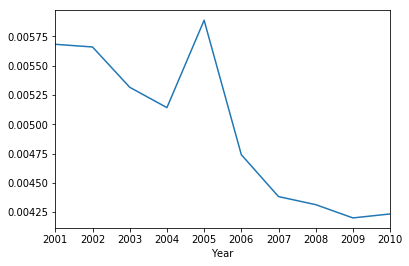

In [75]:
data_ph['Fetal Death Rate'].plot(kind='line')

## Preparing the shapefiles

In [3]:
shp = gp.read_file('Regions.shp')

In [74]:
len(shp)

17

In [4]:
shp['Region']= ' '
shp.head()

,geometry,Region
0,(POLYGON ((119.4669418334962 4.586939811706523...,
1,(POLYGON ((122.9841690063476 11.71055984497071...,
2,(POLYGON ((125.2216567993167 10.43443965911868...,
3,(POLYGON ((122.4703979492188 16.91995048522949...,
4,"(POLYGON ((126.417503356934 7.964169979095546,...",


In [76]:
data['Region'].unique()

array(['ARMM', 'CAR', 'CARAGA', 'NCR', 'Region 1', 'Region 10',
       'Region 11', 'Region 12', 'Region 2', 'Region 3', 'Region 4A',
       'Region 4B', 'Region 5', 'Region 6', 'Region 7', 'Region 8',
       'Region 9'], dtype=object)

In [7]:
shp['Region'].loc[0] = 'ARMM'
shp['Region'].loc[1] = 'Region 5'
shp['Region'].loc[2] = 'Region 4A'
shp['Region'].loc[3] = 'Region 2'
shp['Region'].loc[4] = 'Region 13'
shp['Region'].loc[5] = 'Region 3'
shp['Region'].loc[6] = 'Region 7'
shp['Region'].loc[7] = 'CAR'
shp['Region'].loc[8] = 'Region 11'
shp['Region'].loc[9] = 'Region 8'
shp['Region'].loc[10] = 'Region 1'
shp['Region'].loc[11] = 'Region 4B'
shp['Region'].loc[12] = 'NCR'
shp['Region'].loc[13] = 'Region 10'
shp['Region'].loc[14] = 'Region 12'
shp['Region'].loc[15] = 'Region 6'
shp['Region'].loc[16] = 'Region 9'
shp.head()

,geometry,Region
0,(POLYGON ((119.4669418334962 4.586939811706523...,ARMM
1,(POLYGON ((122.9841690063476 11.71055984497071...,Region 5
2,(POLYGON ((125.2216567993167 10.43443965911868...,Region 4A
3,(POLYGON ((122.4703979492188 16.91995048522949...,Region 2
4,"(POLYGON ((126.417503356934 7.964169979095546,...",Region 13


In [8]:
shp.to_file('regions.shp')

In [82]:
shp.iloc[1:2]

,geometry,Region
1,(POLYGON ((122.9841690063476 11.71055984497071...,Region 5


In [78]:
x = shp.merge(data)

In [84]:
data.describe()

,Year,Total Livebirths,Fetal Deaths,Fetal Death Rate
count,170.000000,170.000000,170.000000,170.000000
mean,2005.500000,104983.847059,519.564706,0.004162
std,2.880767,58674.632045,543.796678,0.002336
min,2001.000000,29764.000000,0.000000,0.000000
25%,2003.000000,62937.500000,164.250000,0.002555
50%,2005.500000,89765.000000,291.000000,0.003649
75%,2008.000000,132879.750000,601.250000,0.005504
max,2010.000000,250120.000000,2550.000000,0.013934


In [79]:
x.head()

,geometry,Region,Year,Total Livebirths,Fetal Deaths,Fetal Death Rate
0,(POLYGON ((119.4669418334962 4.586939811706523...,ARMM,2001,53260.0,3.0,0.000056
1,(POLYGON ((119.4669418334962 4.586939811706523...,ARMM,2002,48940.0,5.0,0.000102
2,(POLYGON ((119.4669418334962 4.586939811706523...,ARMM,2003,57957.0,13.0,0.000224
3,(POLYGON ((119.4669418334962 4.586939811706523...,ARMM,2004,60062.0,3.0,0.000050
4,(POLYGON ((119.4669418334962 4.586939811706523...,ARMM,2005,65613.0,11.0,0.000168


In [80]:
x.to_csv('fetaldeathrate.csv')